In [26]:
import xarray as xr
import numpy as np
import scipy.io as io
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sci
from netCDF4 import Dataset as netcdf
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [27]:
def SMB_ELE(matfile,ncfile,title,npng):
    ds= xr.open_dataset(ncfile)
    ds['time']= pd.date_range('2009-11-01','2020-10-31')
    SMB= ds.smb_mean


    matdata=io.loadmat(matfile)
    elevation = matdata['Tmsr'][0] / 0.00085
    t = matdata['time'][0]
    timepy= pd.to_datetime(t-719529, unit='D')
    E_ds = xr.Dataset(data_vars = dict(elev= (["t"],elevation+(0-elevation[0]))),coords=dict(t=timepy))
    # add ax2 if another variable wanted REMEMBER to change name of file
    fig, (ax1) = plt.subplots(1,figsize=(14,12), sharex=True)
    plt.suptitle(title, fontsize=16)

    color = 'tab:red'
    color2 = 'tab:cyan'
    ax1.set_ylabel(str(SMB.units), color=color, fontsize=14)
    a,= ax1.plot(E_ds.t, E_ds.elev, color=color, label = 'Recur dh/dt')
    #ax2=ax1.twinx()
    #ax2.set_ylabel('SMB ['+str(SMB.units)+']',color=color2, fontsize=14)
    b, = ax1.plot(SMB.time.sel(time=slice('2010-07-16','2019-12-31')), SMB.sel(time=slice('2010-07-16','2019-12-31')).cumsum(), color=color2, label = 'SMB MAR')
    p = [a,b]
    ax1.legend(p,[p_.get_label() for p_ in p])
    ax1.axhline(y=0,linestyle='dashed',color='gray')
    
    #color = 'tab:blue'
    #ax2.set_ylabel(str(SMB.units), color=color, fontsize=14)  # we already handled the x-label with ax1
    #ax2.plot(SMB.time.sel(time=slice('2010-07-16','2019-12-31')), SMB.sel(time=slice('2010-07-16','2019-12-31')).cumsum(), color=color)
    #ax2.legend(['MAR: SMB(cumulative)'])
    
    
    fig.tight_layout(rect=[0, 0.03, 1, 0.95])  # otherwise the right y-label is slightly clipped
    plt.savefig(npng)
    plt.show()

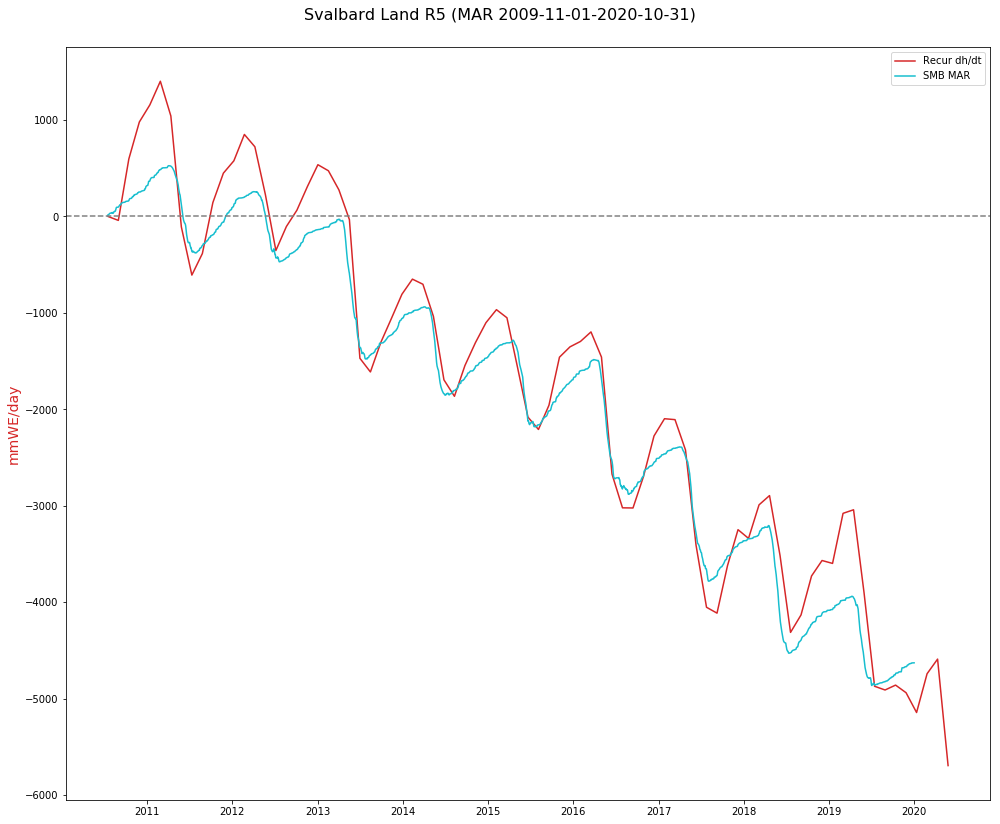

In [28]:
SMB_ELE('/geos/d14/CS2/dhdt/Timeseries/Svalbard_LR5_MF/tmsr_45_90_07_rgi60_Svalbard_corr_land_R5.mat','/exports/csce/datastore/geos/groups/geos_EO/Databases/MAR/Svalbard-RA/Svalbard_Masked/Region_Tmsr/Svalbard_LR5.nc','Svalbard Land R5 (MAR 2009-11-01-2020-10-31)','Sval_SMBELE_LR5_2month_units.png')


In [29]:
def MARplot(matfile,ncfile,title,npng):
    ds= xr.open_dataset(ncfile)
    ds['time']= pd.date_range('2010-01-01','2020-12-31')
    SMB= ds.smb_mean
    TSH=ds.tsh_mean
    SC=ds.sc_mean
    SM=ds.sm_mean


    matdata=io.loadmat(matfile)
    elevation = matdata['Tmsr'][0] /0.00085
    t = matdata['time'][0]
    timepy= pd.to_datetime(t-719529, unit='D')
    E_ds = xr.Dataset(data_vars = dict(elev= (["t"],elevation+(0-elevation[0]))),coords=dict(t=timepy))
    

    fig, (ax1, ax3,ax4) = plt.subplots(3,figsize=(16,15), sharex=True)
    plt.suptitle(title, fontsize=16)

    color = 'tab:red'
    color2 = 'tab:blue'
    ax1.set_ylabel('mmWE/day', color=color, fontsize=15)
    a,= ax1.plot(E_ds.t, E_ds.elev, color=color,label = 'Recur dh/dt')
    b, = ax1.plot(SMB.time.sel(time=slice('2010-07-18','2019-12-31')), SMB.sel(time=slice('2010-07-18','2019-12-31')).cumsum(), color=color2, label = 'SMB MAR')
    ax1.axhline(y=0,linestyle='dashed',color='gray')
   # ax2 = ax1.twinx()
   # color = 'tab:blue'
   # ax2.set_ylabel(SMB.units, color=color, fontsize=15)  # we already handled the x-label with ax1
   # b, = ax2.plot(SMB.time.sel(time=slice('2010-07-18','2019-12-31')), SMB.sel(time=slice('2010-07-18','2019-12-31')).cumsum(), color=color, label = 'SMB MAR')
    p = [a,b]
    ax1.legend(p, [p_.get_label() for p_ in p])
    
    color = 'tab:green'
    color2= 'tab:purple'
    ax3.set_ylabel(TSH.units, color=color, fontsize=15) 
    ax3.plot(E_ds.t, E_ds.elev*0.00085, color=color2,label = 'CryoSat-2 dh/dt')
    ax3.plot(TSH.time.sel(time=slice('2010-07-18','2019-12-31')), TSH.sel(time=slice('2010-07-18','2019-12-31')).cumsum(), color=color)
    ax3.legend(['CryoSat-2 dh/dt','TSH MAR'])
    
    color = 'tab:brown'
    ax4.set_ylabel(SC.units, color=color, fontsize=15)  
    c, = ax4.plot(SC.time.sel(time=slice('2010-07-18','2019-12-31')), SC.sel(time=slice('2010-07-18','2019-12-31')).cumsum(), color=color ,label = 'SC MAR')
    color= 'tab:orange'
    d, =ax4.plot(SM.time.sel(time=slice('2010-07-18','2019-12-31')), -SM.sel(time=slice('2010-07-18','2019-12-31')).cumsum(), color=color ,label = 'SM MAR')
    p2 = [c,d]
    ax4.legend(p2,[p_.get_label() for p_ in p2])
    
    fig.tight_layout(rect=[0, 0.03, 1, 0.95])  # otherwise the right y-label is slightly clipped
    plt.savefig(npng)
    plt.show()
   



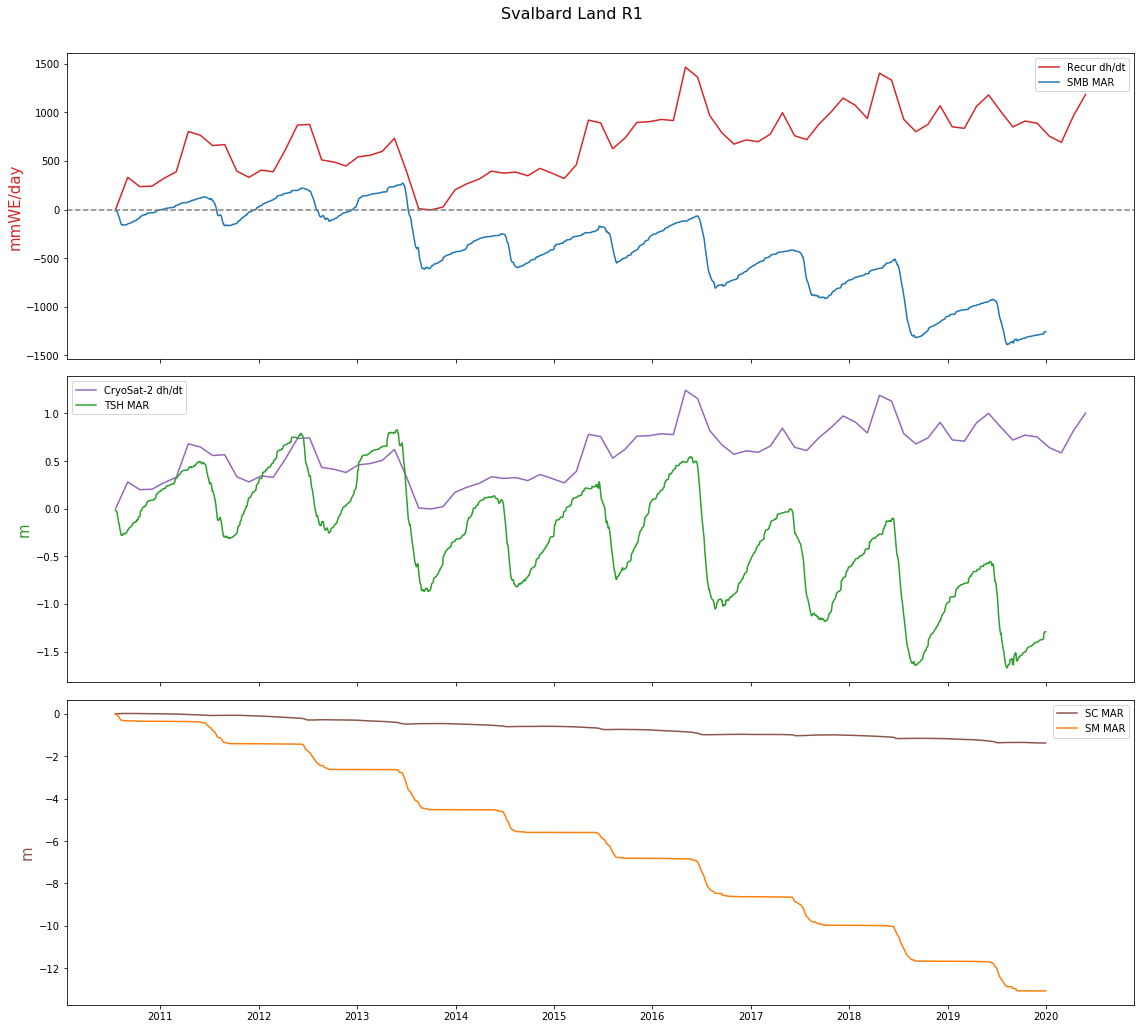

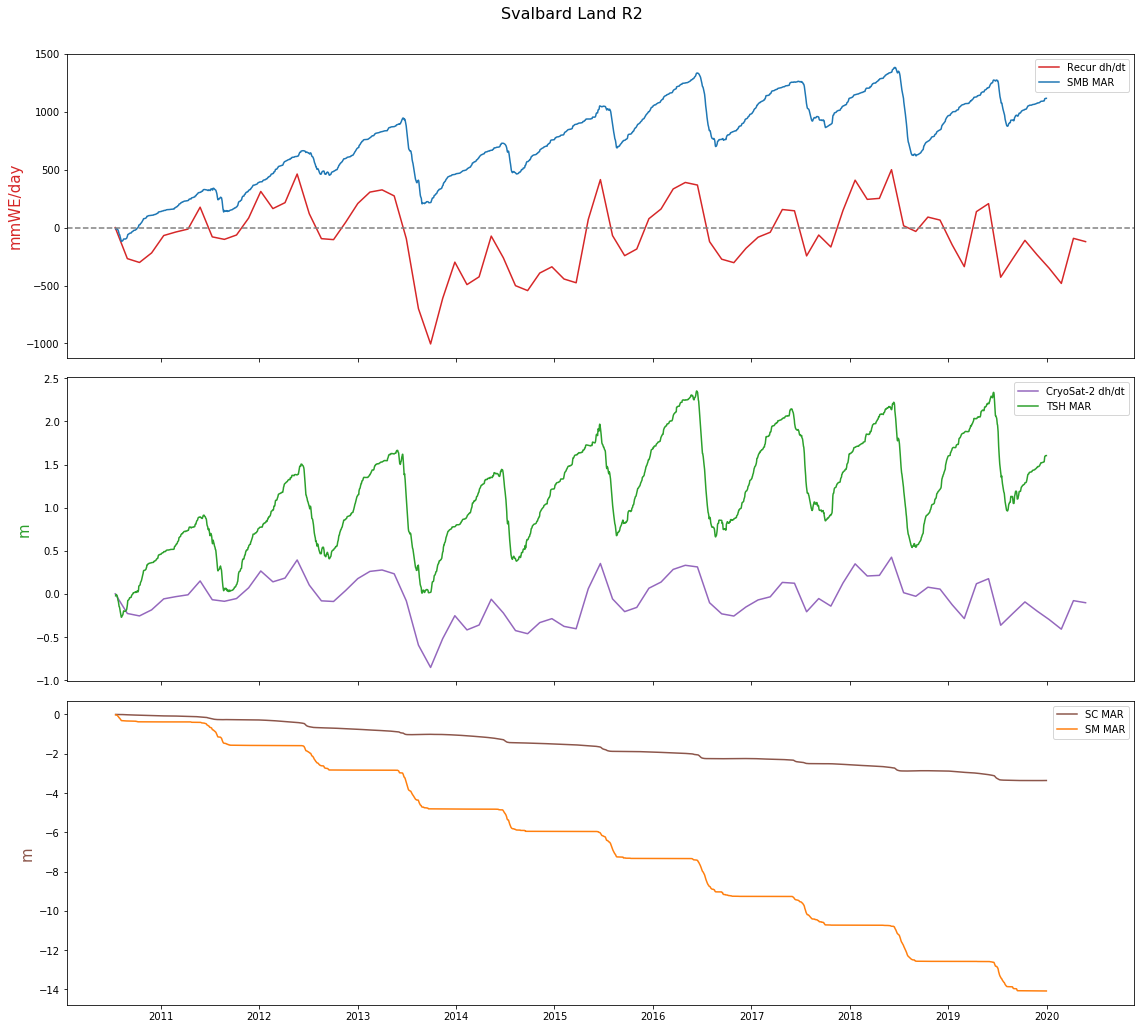

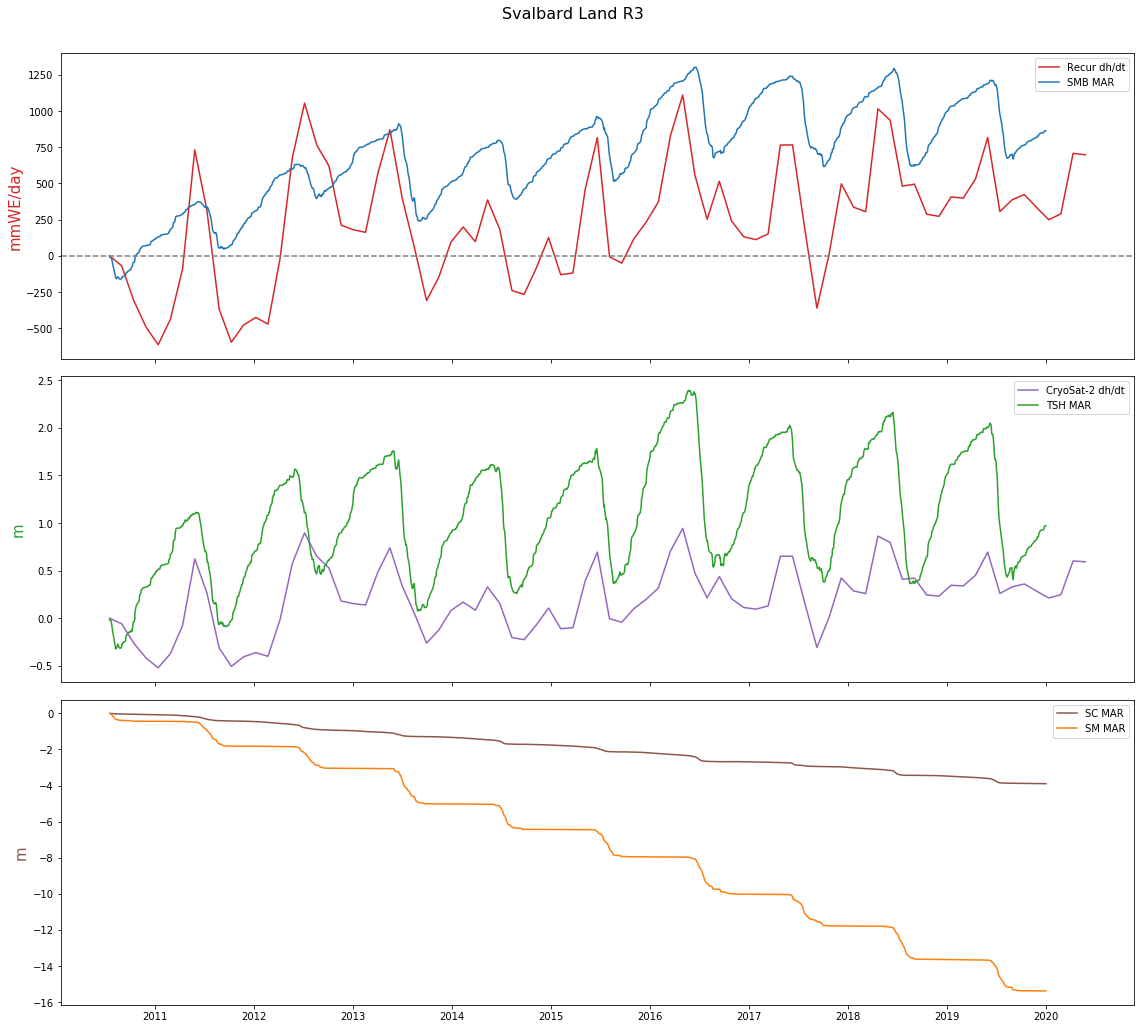

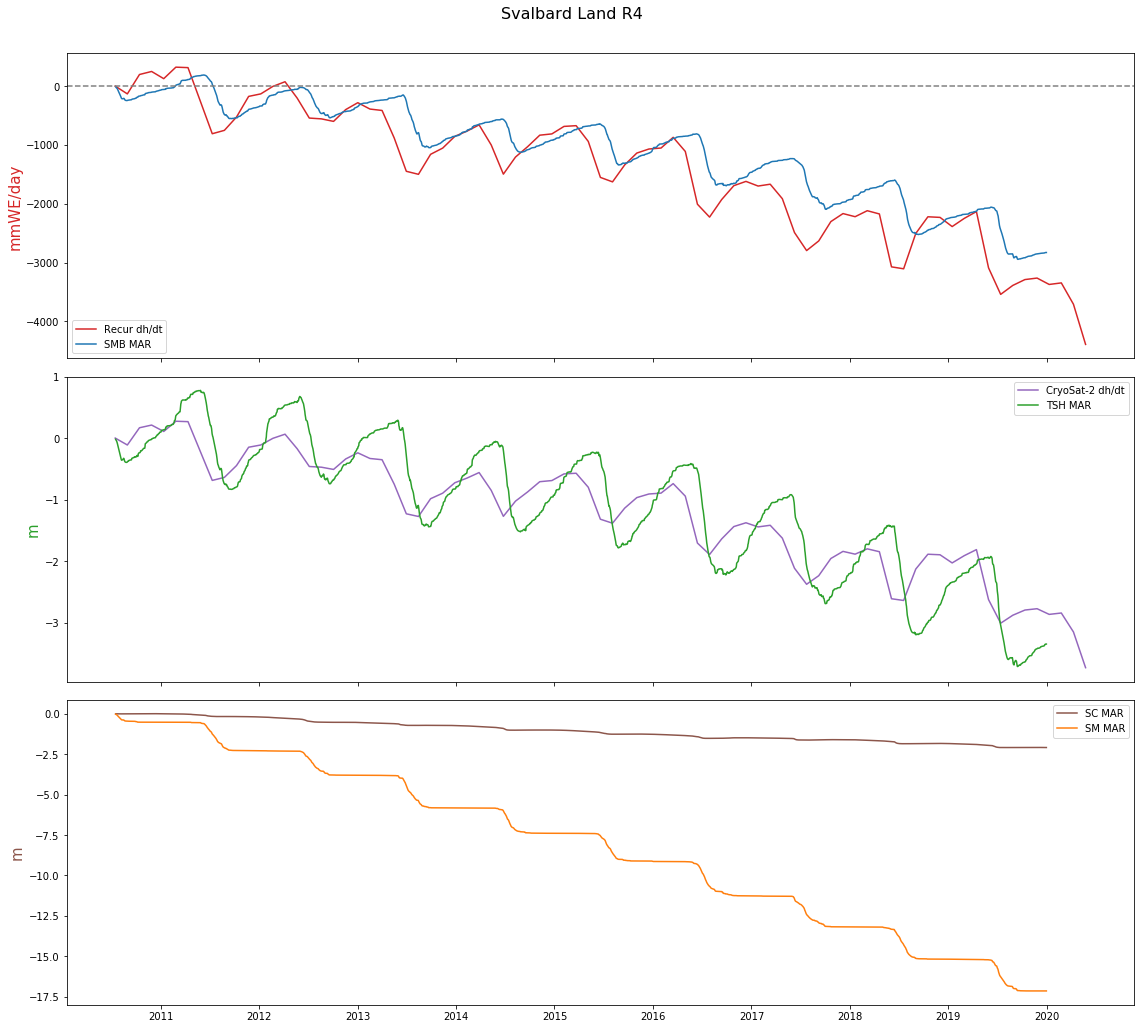

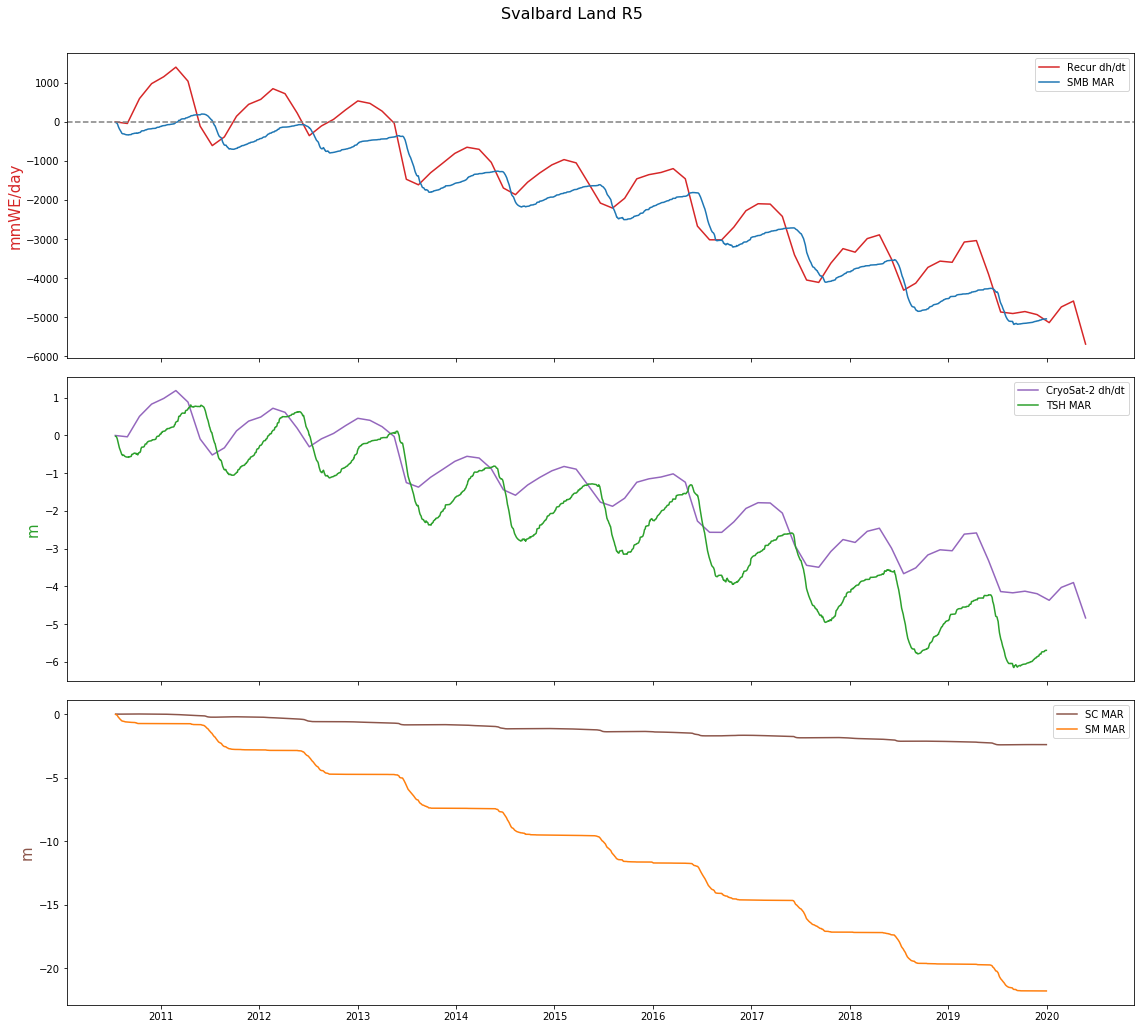

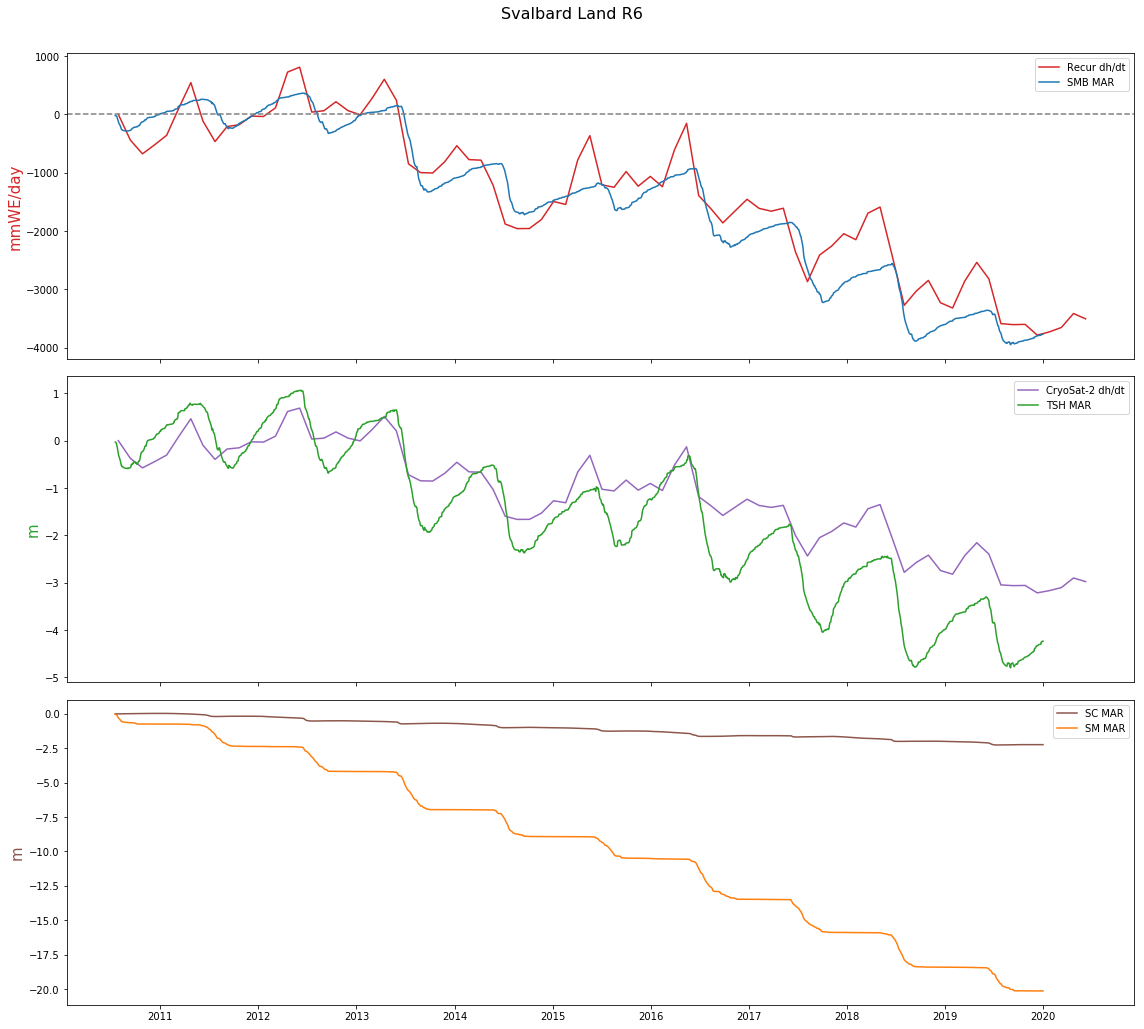

In [30]:
for i in range(1,7):
    MARplot('/geos/d14/CS2/dhdt/Timeseries/Svalbard_LR'+str(i)+'_MF/tmsr_45_90_07_rgi60_Svalbard_corr_land_R'+str(i)+'.mat','/exports/csce/datastore/geos/groups/geos_EO/Databases/MAR/Svalbard-RA/Svalbard_Masked/Region_Tmsr/Svalbard_LR'+str(i)+'.nc','Svalbard Land R'+str(i),'Svalbard_MAR_LR'+str(i)+'_Heightcum.png')
